## 3.1 NumPy使用
------------
### 3.1.1 什么是NumPy？
#### （1）简介
NumPy是一个用Python实现的科学计算包。该工具可用来存储和处理大型矩阵，比Python自身的嵌套列表结构高效。主要包括：
+ 强大的**N维数组**对象Array
+ 成熟的**广播函数库**
+ 用于整合**C/C++** 和Fortran代码的工具包
+ 实用的**线性代数、傅里叶变换和随机数生成函数**

Numpy的特点：
+ 运算速度快：采用C语言编写
+ 消耗资源少：采用矩阵预算，比Python自带的字典和列表快很多

#### （2） Numpy和原生Python的效率比较
通过“向量加法”案例比较代码量和效率两个方面

+ **代码可读性比较**

纯Python写法：



In [1]:
# pure Python code
def python_sum(n):    
    # a = range(n)
    a = list(range(n))
    b = list(range(n))
    #print('a:', a)
    #print('b:', b)
    result = []
    for i in range(len(a)):
        result.append(a[i] + b[i])
    #print('result:', result)
    return result

res = python_sum(10)


Numpy写法：

In [2]:
import numpy as np
def numpy_sum(n):
    a = np.arange(n)
    b = np.arange(n)
    #print('a:', a)
    #print('b:', b)
    result = a + b
    #print('result:', result)
    return result
res = numpy_sum(10)


In [3]:
np.arange(10, step=4)

array([0, 4, 8])

In [4]:
help(np.arange)

Help on built-in function arange in module numpy:

arange(...)
    arange([start,] stop[, step,], dtype=None, *, like=None)
    
    Return evenly spaced values within a given interval.
    
    Values are generated within the half-open interval ``[start, stop)``
    (in other words, the interval including `start` but excluding `stop`).
    For integer arguments the function is equivalent to the Python built-in
    `range` function, but returns an ndarray rather than a list.
    
    When using a non-integer step, such as 0.1, the results will often not
    be consistent.  It is better to use `numpy.linspace` for these cases.
    
    Parameters
    ----------
    start : integer or real, optional
        Start of interval.  The interval includes this value.  The default
        start value is 0.
    stop : integer or real
        End of interval.  The interval does not include this value, except
        in some cases where `step` is not an integer and floating point
        round-off 

+ **计算速度比较**

In [11]:
import sys
from datetime import datetime
import numpy as np

size = 500000
start = datetime.now()
c = python_sum(size)
delta1 = datetime.now() - start
print('python_sum:', delta1)

start = datetime.now()
d = numpy_sum(size)
delta2 = datetime.now() - start
print('numpy_sum:', delta2)

print("======================")
print(delta1/delta2)

python_sum: 0:00:00.104752
numpy_sum: 0:00:00.001994
52.53360080240722


### 3.1.2 Numpy基础
#### (1) 创建Numpy数组
在上一节已经创建了一个有序的一维数组，使用到了np.arange(n)，该函数和Python中的列表一样，从0开始，在默认的情况下步长为1。Numpy还可以创建通用的数组和特殊数组。
+ array：创建普通数组
+ zeros：创建数据全为0
+ ones：创建数据全为1
+ empty：创建数据全为空
+ linspace：创建线性变化的数组
+ reshape：改变数组的形状
+ 随机矩阵：```np.random.random((2,4))```(最基本的)

Numpy创建的数组是一个数组对象，该对象中包含了两个部分：
+ 实际的数据
+ 描述这些数据的元数据

In [13]:
np.array([2,3,4])


array([2, 3, 4])

In [15]:
np.array([0.2,0.3,5],dtype=np.float64)

array([0.2, 0.3, 5. ])

In [17]:
np.array([[1,15,20],
          [20,2,90]])

array([[ 1, 15, 20],
       [20,  2, 90]])

In [18]:
np.zeros((3,4))

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [19]:
np.ones((3,4),dtype=np.float32)

array([[1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.]], dtype=float32)

In [20]:
np.empty((3,4))

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [23]:
np.linspace(0, 100, 20, endpoint=False) #参数分别是起始数，终止数，数目

array([ 0.,  5., 10., 15., 20., 25., 30., 35., 40., 45., 50., 55., 60.,
       65., 70., 75., 80., 85., 90., 95.])

In [25]:
a = np.arange(12).reshape((3,4))
print(a)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]


In [26]:
a[2,1]

9

In [30]:
a = np.random.random( (2,3) )
print(a)
print(type(a))

[[0.03077402 0.17691179 0.7646126 ]
 [0.71370554 0.63638371 0.63997957]]
<class 'numpy.ndarray'>


#### (2) Numpy数组的属性、索引与切片
**属性**

描述数组的元数据我们可以称之为属性，常用属性如下：
+ ndim：获取数组的**维度数**。
+ shape：获取数组的**行数和列数**。
+ size：数组中一共有几个元素，即**元素个数**。
+ itemsize：获取数组中的元素在内存中**单个元素所占的字节数**。
+ nbytes：整个数组所占的**存储空间**，即itemsize\* size。
+ flat：返回一个numpy.flatiter对象，即“**扁平迭代器**”可以像遍历一维数组一样去遍历任意的多维数组，示例代码见后文。
+ T：**多维数组转置**，但是特殊的是一维数组，T属性还是它本身。

In [34]:
a = np.random.random((2,4))
print(a)
print(a.ndim)
print(a.shape)
print(a.size)
print(a.itemsize)
print(a.nbytes)

print(a.T)

[[0.92947088 0.27552814 0.27669168 0.53772134]
 [0.67416675 0.55094395 0.41929846 0.94952037]]
2
(2, 4)
8
8
64
[[0.92947088 0.67416675]
 [0.27552814 0.55094395]
 [0.27669168 0.41929846]
 [0.53772134 0.94952037]]


In [35]:

# 一维向量转置 示例代码：
a = np.arange(5)
print(a)
# 一维数组T转置为本身
print(a.T)

# 一维数组的转置
print(a.reshape(len(a),1))

[0 1 2 3 4]
[0 1 2 3 4]
[[0]
 [1]
 [2]
 [3]
 [4]]


In [36]:
# 扁平迭代器示例代码：
a = np.arange(18).reshape(3,6)
print(a)

# 按照维度输出
for item in a: 
    print(item)
# 按照元素输出
for item in a.flat: 
    print(item)


[[ 0  1  2  3  4  5]
 [ 6  7  8  9 10 11]
 [12 13 14 15 16 17]]
[0 1 2 3 4 5]
[ 6  7  8  9 10 11]
[12 13 14 15 16 17]
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17


（2）索引与切片
一些特殊的索引与切片表达方式：
+ ```A[1][4]```等价于```A[1,4]```
+ ```A[1,1:3]```表示第二行的第二个数到第三个数

In [38]:
a[1][4]

10

In [40]:
a[1,4]

10

In [41]:
a

array([[ 0,  1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10, 11],
       [12, 13, 14, 15, 16, 17]])

In [28]:
a[1:3,1:3]

array([[ 7,  8],
       [13, 14]])

#### (3) Numpy初阶运算
+ **逻辑判断**运算返回Ture或者False
+ 矩阵基本的**加减乘除**不在话下
+ **n次方**使用```**n```
+ 对矩阵每一个元素进行**函数运算**：```b=10*np.sin(a)```
+ 特别注意：**两种乘法**
+ ```axis```查找运算
+ **反求索引**：```argmin()``` 和```argmax()```两个函数分别对应着求矩阵中最小元素和最大元素的索引
+ **累加函数**：cumsum()
+ **累差函数**：diff()

说明：初阶运算主要是一些简单运算和函数的使用，后文高阶运算主要是线性代数方面的矩阵计算。


In [44]:
#两种乘法的示例代码：
a = np.array([1,2,3,4]).reshape(2,2)
b = np.array([1,2,2,1]).reshape(2,2)

print('a\n',a)
print('b\n',b)
# 元素与对应位置的元素相乘
print('a*b\n', a*b)
print('b*a\n', b*a)

# 矩阵乘法
print('a.dot(b)\n', a.dot(b))
print('b.dot(a)\n', b.dot(a))


a
 [[1 2]
 [3 4]]
b
 [[1 2]
 [2 1]]
a*b
 [[1 4]
 [6 4]]
b*a
 [[1 4]
 [6 4]]
a.dot(b)
 [[ 5  4]
 [11 10]]
b.dot(a)
 [[ 7 10]
 [ 5  8]]


In [45]:
x = np.array([1, 2, 4, 7, 0])
np.argmin(x)

4

In [47]:
np.argmax(x)

3

In [48]:
np.min(x), np.max(x)

(0, 7)

In [49]:
np.cumsum(x)

array([ 1,  3,  7, 14, 14], dtype=int32)

In [51]:
np.diff(x)

array([ 1,  2,  3, -7])

In [52]:
help(np.diff)

Help on function diff in module numpy:

diff(a, n=1, axis=-1, prepend=<no value>, append=<no value>)
    Calculate the n-th discrete difference along the given axis.
    
    The first difference is given by ``out[i] = a[i+1] - a[i]`` along
    the given axis, higher differences are calculated by using `diff`
    recursively.
    
    Parameters
    ----------
    a : array_like
        Input array
    n : int, optional
        The number of times values are differenced. If zero, the input
        is returned as-is.
    axis : int, optional
        The axis along which the difference is taken, default is the
        last axis.
    prepend, append : array_like, optional
        Values to prepend or append to `a` along axis prior to
        performing the difference.  Scalar values are expanded to
        arrays with length 1 in the direction of axis and the shape
        of the input array in along all other axes.  Otherwise the
        dimension and shape must match `a` except along ax

**axis查找运算**的示例代码：

如果你需要对行或者列进行查找运算，当axis的值为0的时候，将会以列作为查找单元， 当axis的值为1的时候，将会以行作为查找单元。
+ **0->行**
+ **1->列**

In [36]:
a_random = np.random.random((2,4))
print(a_random)
print("sum=", np.sum(a_random))
print("sum=", np.sum(a_random,axis=0))
print("sum=", np.sum(a_random,axis=1))

print("min=", np.min(a_random,axis=1))

[[0.55543714 0.8902911  0.09030381 0.01640017]
 [0.61533283 0.61796788 0.52268143 0.48740606]]
sum= 3.795820427074635
sum= [1.17076998 1.50825898 0.61298524 0.50380623]
sum= [1.55243222 2.2433882 ]
min= [0.01640017 0.48740606]


#### (4) Numpy数组的合并与分割
**合并**
+ 上下合并：vstack
+ 左右合并：hstack
+ 通过axis指定合并方式：concatenate

In [53]:
a = np.arange(4).reshape(2,2)
b = np.arange(4).reshape(2,2)
b2 = np.arange(4).reshape(2,2)

c = np.vstack((a,b,b2))
d = np.hstack((a,b))
e = np.concatenate((a,b),axis=0)
f = np.concatenate((a,b),axis=1)

In [38]:
print(a)
print(b)
print(c)
print(d)
print(e)
print(f)

[[0 1]
 [2 3]]
[[0 1]
 [2 3]]
[[0 1]
 [2 3]
 [0 1]
 [2 3]
 [0 1]
 [2 3]]
[[0 1 0 1]
 [2 3 2 3]]
[[0 1]
 [2 3]
 [0 1]
 [2 3]]
[[0 1 0 1]
 [2 3 2 3]]


**分割**
+ 等量分割
	+ 纵向等量分割
	+ 横向等量分割
+ 不等量分割的错误示例
+ 不等量分割
+ 其他分割
	+ 横向分割
	+ 纵向分割

In [54]:
a = np.arange(12).reshape((3,4))
print(a)

print(np.split(a, 3, axis=0))
print(np.split(a, 2, axis=1))
print(np.array_split(a, 3, axis=0))


[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
[array([[0, 1, 2, 3]]), array([[4, 5, 6, 7]]), array([[ 8,  9, 10, 11]])]
[array([[0, 1],
       [4, 5],
       [8, 9]]), array([[ 2,  3],
       [ 6,  7],
       [10, 11]])]
[array([[0, 1, 2, 3]]), array([[4, 5, 6, 7]]), array([[ 8,  9, 10, 11]])]


In [40]:
# 错误的示例
#print(np.split(a, 3, axis=1))

In [41]:
print(np.vsplit(a, 3))
print(np.hsplit(a, 2))

[array([[0, 1, 2, 3]]), array([[4, 5, 6, 7]]), array([[ 8,  9, 10, 11]])]
[array([[0, 1],
       [4, 5],
       [8, 9]]), array([[ 2,  3],
       [ 6,  7],
       [10, 11]])]



#### (5) Numpy的深拷贝
Python中的赋值、深拷贝和浅拷贝三者之间的区别是Python中一个比较难的问题，暂时不考虑，本节只需要理解一下两点：
+ ```=``` 的赋值方式会带**有关联性**
+ ```copy()```的赋值方式**没有关联性**

In [55]:

a = np.arange(4)
print(a)
# 深拷贝：无关联性
b = a.copy()


# 赋值：有关联性
c = a



[0 1 2 3]


In [43]:
# 观察关联性
a[3] = 888

print(a)
print(b)
print(c)


[  0   1   2 888]
[0 1 2 3]
[  0   1   2 888]


## 3.2 GDAL读写文件
------------
### 3.2.1 读文件

In [56]:
from osgeo import gdal
filename = r'D:\course\open-source-gis\2017\notebook\data\dem\dem_fengle.tif'
ds = gdal.Open(filename)   #得到Dataset，一个Dataset可能包含多个波段
band = ds.GetRasterBand(1) #得到第一个波段
data = band.ReadAsArray()
print(data)
print(type(data))

[[ 42  40  38 ...  37  41  44]
 [ 44  43  41 ...  39  39  43]
 [ 43  46  45 ...  37  39  44]
 ...
 [319 327 330 ...  53  52  50]
 [339 361 376 ...  54  52  52]
 [356 391 413 ...  55  54  55]]
<class 'numpy.ndarray'>


In [57]:
band.ReadAsArray(350,350,10,5)   #按窗口读取，band.ReadAsArray(xoff=0, yoff=0, win_xsize=None, win_ysize=None...)

array([[43, 40, 38, 37, 38, 38, 37, 37, 38, 37],
       [40, 39, 39, 37, 37, 38, 38, 37, 36, 35],
       [44, 43, 43, 40, 39, 40, 41, 39, 37, 37],
       [51, 48, 44, 41, 39, 42, 47, 44, 40, 38],
       [46, 44, 40, 40, 43, 43, 46, 47, 45, 45]], dtype=int16)

In [58]:
%matplotlib inline

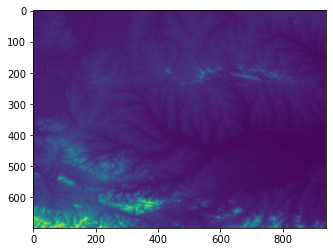

In [59]:
import matplotlib.pyplot as plt
plt.imshow(data)

In [60]:
geotrans = ds.GetGeoTransform()
geotrans

(116.35541727201625,
 0.0008333333333333313,
 0.0,
 31.888750581135195,
 0.0,
 -0.0008333333333333287)

GetGeoTransform函数的返回参数是仿射变换的参数，对于一个上方为正北的影像，参数的意义如下：

adfGeoTransform[0] /* top left x */

adfGeoTransform[1] /* w-e pixel resolution */

adfGeoTransform[2] /* 0 */

adfGeoTransform[3] /* top left y */

adfGeoTransform[4] /* 0 */

adfGeoTransform[5] /* n-s pixel resolution (negative value) */


In [62]:
proj_info = ds.GetProjection()  #得到投影信息
proj_info

'GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST],AUTHORITY["EPSG","4326"]]'

In [63]:
ds.RasterCount      #波段数

1

In [64]:
n_rows, n_cols = band.YSize, band.XSize #行列数
n_rows, n_cols

(698, 940)

In [65]:
nodata_value = band.GetNoDataValue()  #空值
nodata_value

-32767.0

In [66]:
band.GetMaximum(), band.GetMinimum()

(400.0, 1.0)

In [67]:
data = band.ReadAsArray()
np.max(data), np.min(data)

(520, 1)

In [68]:
band.DataType, gdal.GDT_Int16  #band.DataType是该波段的数据类型，为枚举型，这里的6代表gdal.GDT_Float32。gdal.GDT_ 开头的是gdal中的数据类型

(3, 3)

In [69]:
gdal.GDT_Int32

5

### 3.2.2 写文件

In [70]:
import os
f_name = r'D:\course\open-source-gis\2017\notebook\data\test5.tiff'
os.path.exists(f_name)

True

In [71]:
driver = gdal.GetDriverByName("GTiff")
ds_out = driver.Create(f_name, n_cols, n_rows, 1, gdal.GDT_Float32)

In [59]:
help(driver.Create)

Help on method Create in module osgeo.gdal:

Create(*args, **kwargs) method of osgeo.gdal.Driver instance
    Create(Driver self, char const * utf8_path, int xsize, int ysize, int bands=1, GDALDataType eType, char ** options=None) -> Dataset



In [72]:
ds_out.SetGeoTransform(geotrans)
ds_out.SetProjection(proj_info)
band_out = ds_out.GetRasterBand(1)
band_out.SetNoDataValue(nodata_value)
band_out.WriteArray(data)
ds_out.FlushCache()
ds_out = None

### 作业

1. 读取一个tif文件，做四等分，并输出四个tif文件。
